# Sentiment Analysis

也可稱為 opinion mining，用來判斷文字的 emotion 或 opinion。

一般來說，Sentiment Analysis 包含三大主題：
1. Opinion or Emotion: 

Opinion can be positive, neutral, or negative <br/>
Emotion can be qualitative (joy, anger, surprise 等)，也可以是 quantitative (like rating a movie on the scale from 1 to 10)

2. Subject: 這句話的主題在說些什麼？

3. Entity or Opinion holder: 是誰表達了這些看法？

---

## 用一個IMDB的電影reviews資料來實作

IMDB movie review dataset:

label 為 1 時代表 positive <br/>
label 為 0 時代表 negative

In [1]:
import pandas as pd

data = pd.read_csv("Datasets/IMDB_sample.csv")

print(len(data))

data.head(10)

7501


,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0
5,23988,"A propaganda film for the Palestinian ""cause""....",0
6,9970,Sure Star Wars (a movie I have seen at least f...,1
7,9144,To all the haters out there: condemning a TV s...,1
8,9450,I saw the long day's dying when it first came ...,1
9,16174,Sorry to go against the flow but I thought thi...,0


## Data Exploration

### 檢視 label share

In [2]:
# number of positive reviews
print(len(data[data['label'] == 1]))

# number of negative reviews
print(len(data[data['label'] == 0]))

# 合併上述兩小題
# 利用 value_counts() 方法來計算 (跟 R 的 count 一樣)
print(data['label'].value_counts())

# 轉換成百分比來表示
print(data['label'].value_counts() / len(data))

3719
3782
0    3782
1    3719
Name: label, dtype: int64
0    0.504199
1    0.495801
Name: label, dtype: float64


### 檢視最長、最短的 review 的長度

In [3]:
# 用 Pandas Series 的 str.len() 方法，回傳為一個 Pandas Series
length_reviews = data.review.str.len()
print(type(length_reviews))

# 最大值
print(max(length_reviews))

# 最小值
print(min(length_reviews))

<class 'pandas.core.series.Series'>
10321
52


代表最長的 review 有 10321 個字元，最短的 review 只有 52 個字元

---

# Sentiment Analysis 的 levels

1. Document level: 例如分析一個 product 的完整 review
2. Sentence level: 分析一句話是 positive、negative、或 neutral
3. Aspect level: 分析一句話針對各個主詞的 opinion

例如：The camera in this phone is pretty good but the battery life is disappointing. <br/>
一句話中有 positive，也有 negative 的成分。Aspect level 就是去分析哪些 feature 是正面的，哪些 feature 是負面的

---

# Sentiment Analysis 的 Algorithms

可分成兩個主要的類型：<br/>


1. Rule/lexion-based (有個predefine list of words，例如 nice +2, good +1, terrible -3，將句子所有字的 scores 平均或加總來判斷 opinion)

例如：Today is a good day. <br/>
Today: 0, is: 0, a: 0, good: +1, day: 0 <br/>
**Total score:** +1 --> **Positive**

這個方法 (calculate valence of a sentence) 可以用 Python 的 textblob library 來實踐



2. Automatic/Machine learning (can be modelled as a classification problem)

通常有 historical data with labelled sentiment


---

兩個方法的比較：

1. Rule/lexion-based method 可能因為一個字在不同情境的 emotion 或 opinion 不同而效果不好
2. Rule/lexion-based method 較為快速且簡單
3. Automatic/Machine learning 要訓練模型，比較複雜
4. 可以將兩個的結果合併 (hybrid approach)

### Rule/lexion-based 實作

使用 textblob library (非build-in，需額外安裝)

TextBlob object 有很多 attribute，由於我們這裡要討論 sentiment，因此只呼叫 sentiment attribute

In [4]:
text = 'Today is a good day.'

In [7]:
# pip install textblob
from textblob import TextBlob

my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

TextBlob 的 sentiment attribute 回傳一個 tuple，第一個 instance 為 polarity，第二個 instance 為 subjectivity。

polarity 為一個介於 -1 到 1 之間的值，-1 為最 negative，0 為 neutral，1 為最 positive

subjectivity 為一個介於 1 到 0 的值，1 為非常主觀 (subjective)，0 為非常客觀 (objective)

由此可知，我們的例子 "Today is a good day." 是一個主觀正向的句子。

---

課堂練習一

In [8]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"

In [9]:
# Create a textblob object  
blob_titanic = TextBlob(titanic)

# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


---

# 文字雲

The size of the text corresponds to the frequency of the word.

優點：
1. Reveal the essential
2. Provide an overall sense of the text
3. Easy to understand

缺點：
1. Sometimes confusing and uninformative (字詞之間關連不大)
2. Larger text requires more preprocessing steps

---

建立 Word cloud 可以利用 wordcloud package

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
two_cities = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

In [19]:
cloud_two_cities = WordCloud(background_color="white").generate(two_cities)

WordCloud 函數可以調整很多參數，可以在 shell (terminal) 中輸入 ?WordCloud 來深度探索這個函數

這些參數可以用來改變 word cloud 的 background colour、size、font and others。

除此之外，還有一個重要的參數：**stopwords** (常見且無意義的字詞)，要傳入一個存有 stopwords 的 set

In [20]:
# cloud_two_cities 為一個 WordCloud object
cloud_two_cities

如果想要印出 WordCloud object，必須用 matplotlib 的函數

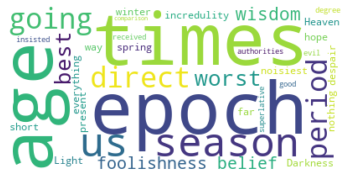

In [21]:
plt.imshow(cloud_two_cities, interpolation = 'bilinear')

# remove axis
plt.axis("off")

# display
plt.show()